In [2]:
import pandas as pd
import os
import opendatasets as od
        

In [3]:
disney = "https://www.kaggle.com/datasets/shivamb/disney-movies-and-tv-shows"
od.download(disney)#DISNEY SHOWS

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: Your Kaggle Key: Downloading disney-movies-and-tv-shows.zip to ./disney-movies-and-tv-shows


100%|██████████| 131k/131k [00:00<00:00, 57.9MB/s]

In [4]:
dfdisney = pd.read_csv('disney-movies-and-tv-shows/disney_plus_titles.csv')

In [5]:
dfdisney.shape

(1450, 12)

In [6]:
dfdisney.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [7]:
dfdisney.isnull().sum() #revision de valores nulos

show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64

In [9]:
#Vamos a quitar las columnas que no ocupamos para el analisis ya que nos interesa conocer nombres de peliculas y ratings para poder promocionarlas mas
dfdisney.drop(['director','cast','date_added'],axis = 1,inplace = True)

In [10]:
dfdisney.head()

,show_id,type,title,country,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,NaN,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,NaN,1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,United States,2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,NaN,2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [11]:
#Revisamos el rating de las peliculas y tv shows
dfdisney['rating'].value_counts()

TV-G        318
TV-PG       301
G           253
PG          236
TV-Y7       131
TV-14        79
PG-13        66
TV-Y         50
TV-Y7-FV     13
Name: rating, dtype: int64

In [12]:
#Revisamos cuales son los generos de peliculas/shows que tienen mas relevancia y estan de top
dfdisney['listed_in'].value_counts()

Animation, Comedy, Family                124
Action-Adventure, Animation, Comedy       77
Action-Adventure, Animation, Kids         45
Action-Adventure, Animation, Family       40
Animals & Nature, Documentary, Family     40
                                        ... 
Comedy, Reality                            1
Animals & Nature, Comedy                   1
Action-Adventure, Crime, Fantasy           1
Action-Adventure, Drama, Historical        1
Action-Adventure, Comedy                   1
Name: listed_in, Length: 329, dtype: int64

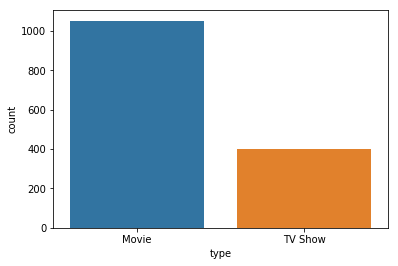

In [20]:
#Vemos graficamente el numero de peliculas y shows para reconocer cual existe en mayor cantidad
import seaborn as sns #visualizacion
import matplotlib.pyplot as plt
sns.countplot(x='type',data = dfdisney)

In [21]:
dfdisney.to_csv('disneychannel_updated.csv')